### Лабараторна робота № 1
### Конюхов Єгор Олександрович
### кн222б
### Тема: Дослідження та візуалізація даних за допомогою Python.
### Мета: Отримати базові навики використання Python для дослідження та візуалізації даних.

In [1]:
N = ord("E") % 3 + 1
print(N)

1


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def fetch_column_data(file_name, column_name):
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        if column_name not in reader.fieldnames:
            raise ValueError(f"Column '{column_name}' is missing in the file.")
        column_values = [float(row[column_name]) for row in reader]
    return np.array(column_values)

aircraft_losses = fetch_column_data('russia_losses_equipment.csv', 'aircraft')
print(aircraft_losses)


[369. 369. 369. ...  27.  27.  10.]


In [8]:
def calculate_losses_per_day(loss_data):
    reversed_data = np.flip(loss_data)
    daily_losses = np.diff(reversed_data, prepend=reversed_data[0])
    return daily_losses

daily_aircraft_losses = calculate_losses_per_day(aircraft_losses)
print(daily_aircraft_losses)


[ 0. 17.  0. ...  0.  0.  0.]


In [9]:
def get_top_losses(daily_loss_data, top_n=3):
    return sorted(daily_loss_data)[-top_n:]

print(get_top_losses(daily_aircraft_losses))


[np.float64(9.0), np.float64(16.0), np.float64(17.0)]


In [10]:
def calculate_summer_losses_2022(loss_data):
    reversed_data = np.flip(loss_data)
    summer_losses = reversed_data[212] - reversed_data[121]
    return summer_losses

print(calculate_summer_losses_2022(aircraft_losses))


42.0


In [11]:
def calculate_average_loss_for_recent_days(loss_data, days=300):
    return np.mean(loss_data[-days:])

print(calculate_average_loss_for_recent_days(daily_aircraft_losses))


0.12666666666666668


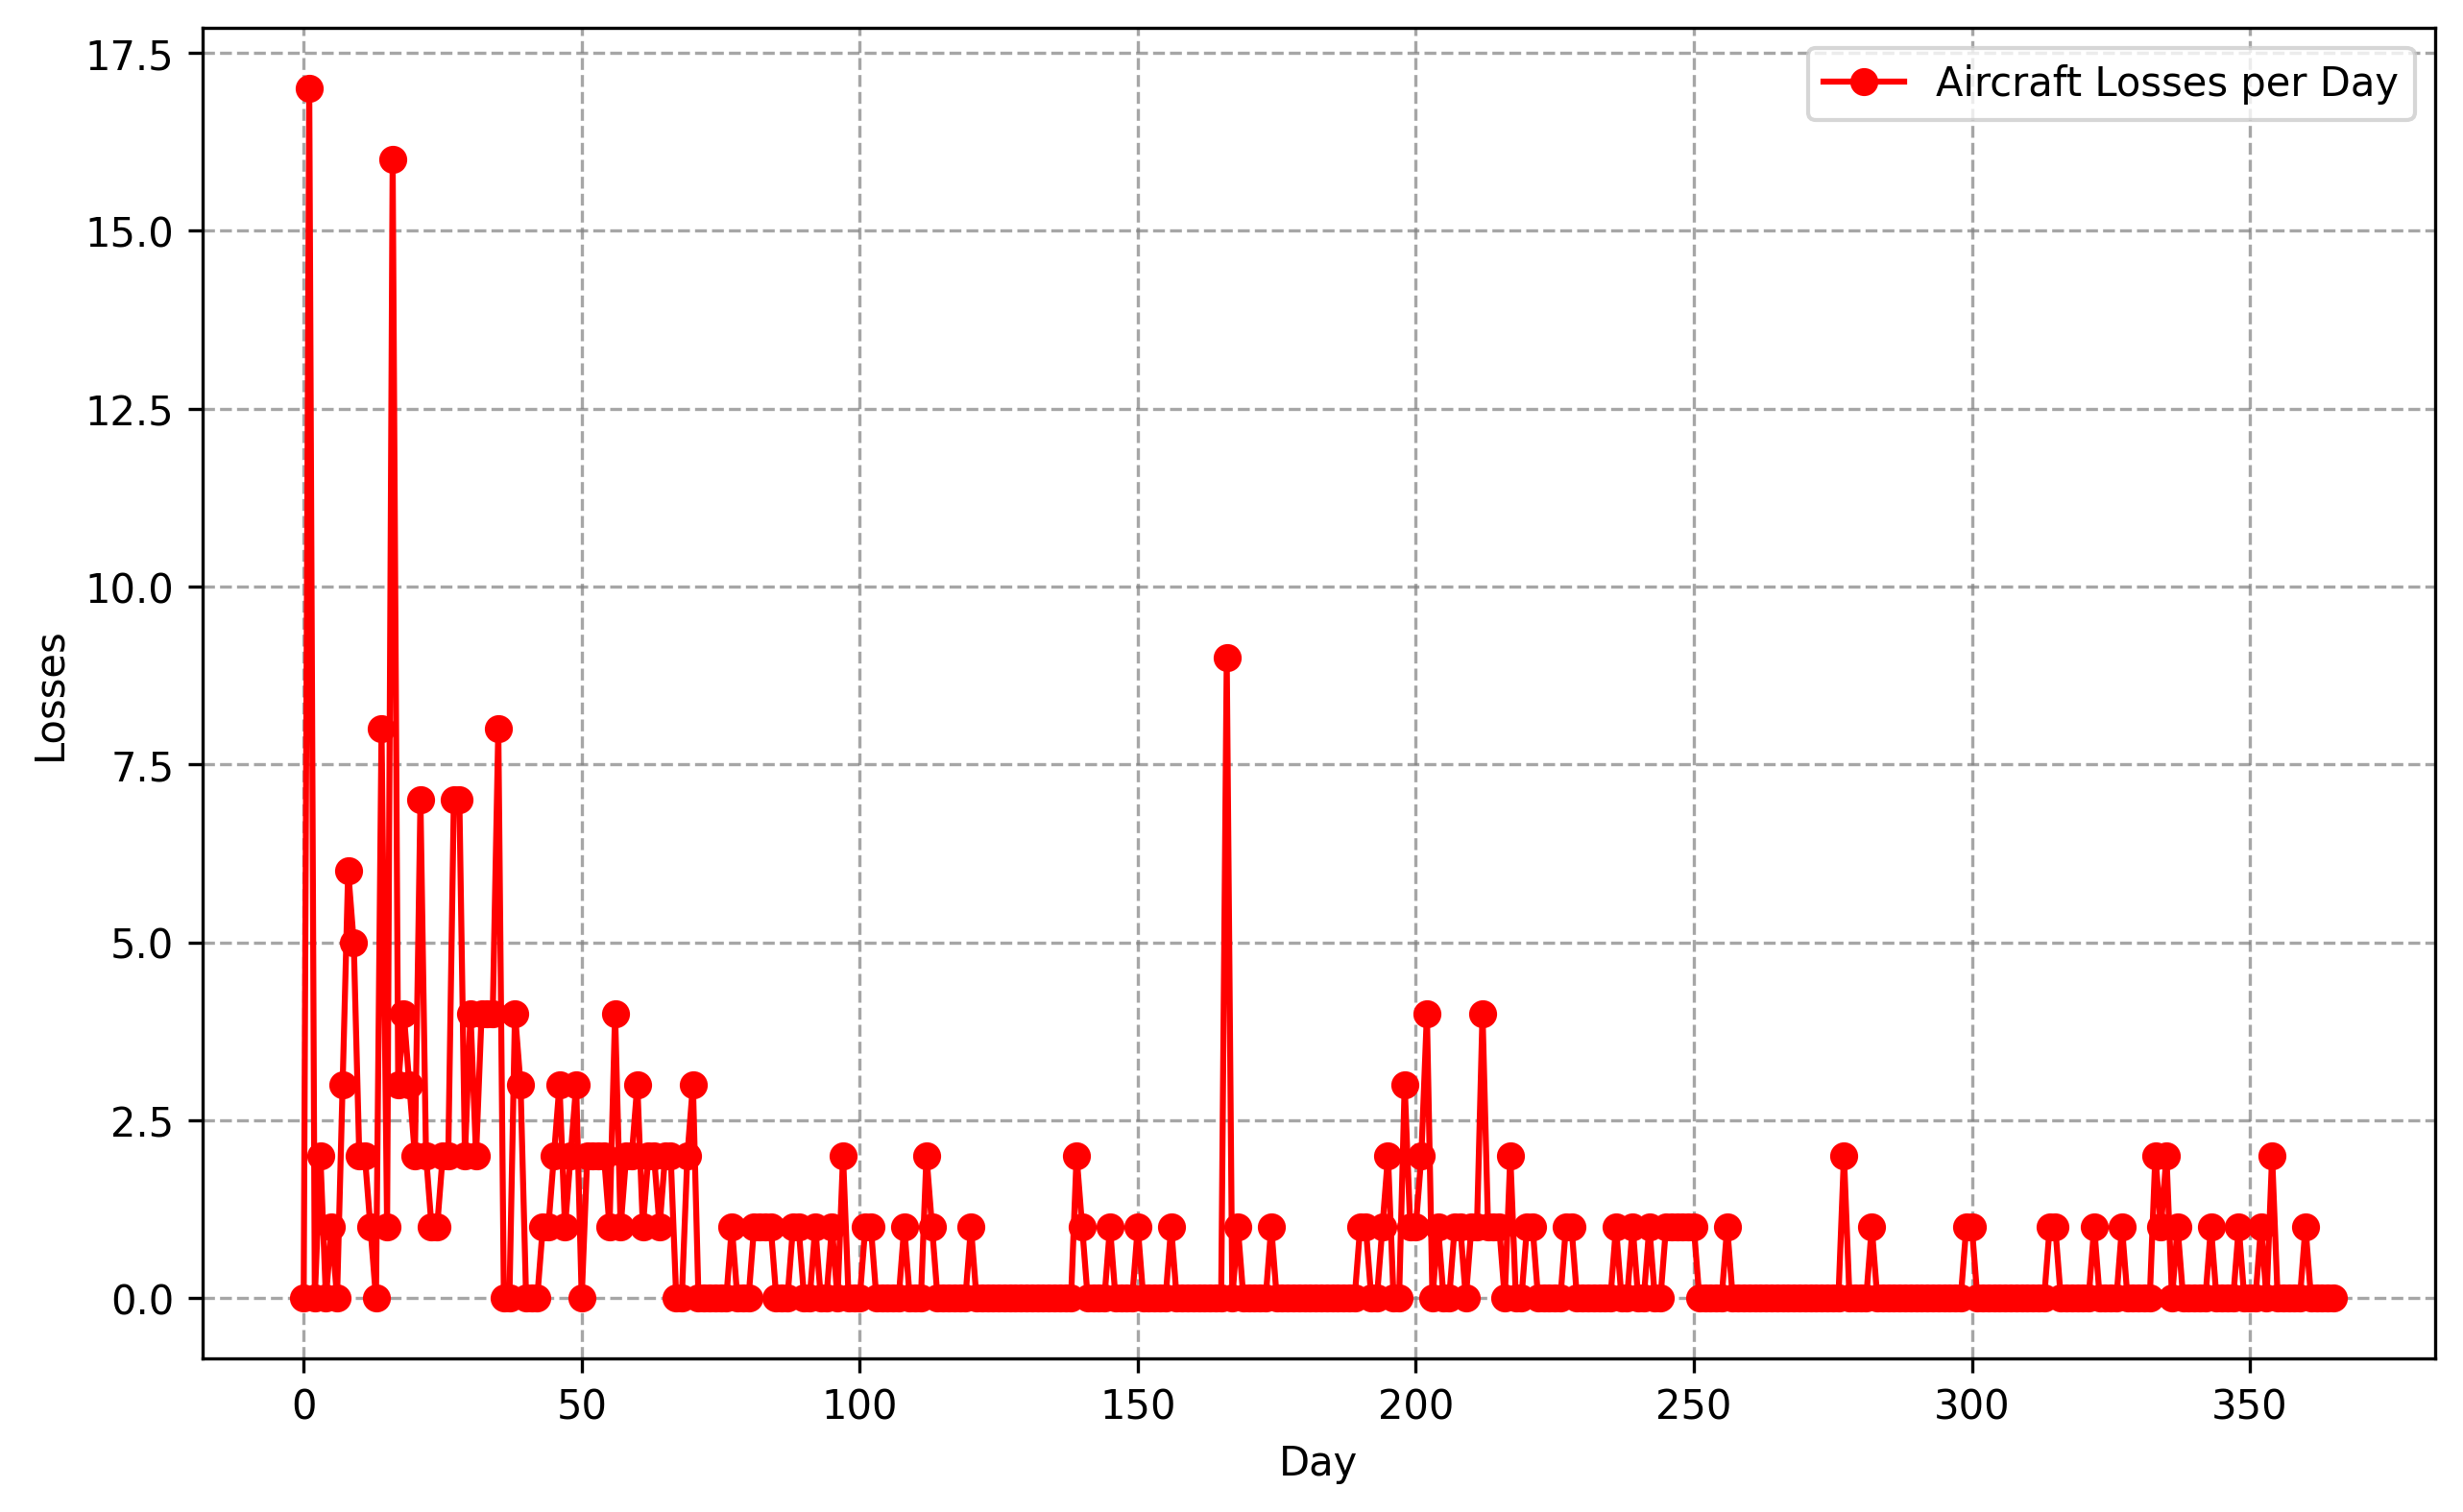

In [12]:
def plot_loss_data_for_first_year(loss_data):
    first_year_losses = loss_data[:366]
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(first_year_losses, marker='o', linestyle='-', color='red', label='Aircraft Losses per Day', linewidth=1.5)
    plt.xlabel('Day')
    plt.ylabel('Losses')
    plt.legend()
    plt.grid(color='grey', linestyle='--', alpha=0.7)
    plt.savefig('aircraft_losses_first_year.png', dpi=300)
    plt.show()

plot_loss_data_for_first_year(daily_aircraft_losses)
